In [99]:
import pandas as pd
import numpy as np

In [100]:
CoffeeIndex = pd.read_csv('./result/전국 커피 지수.csv',sep=',',encoding='utf8', index_col='ID')

# Folium

In [101]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
geo_path = './source/전국 경계선 JSon.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

In [102]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,  
               data = CoffeeIndex['커피지수'],
               columns= [CoffeeIndex.index, CoffeeIndex['커피지수']],
               fill_color= 'YlGnBu',
               key_on='feature.id'
)

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>커피지수와 카페</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))


map

# 카토그램

In [103]:
korea = pd.read_excel('./source/전국 카토그램.xlsx',encoding='utf8')
korea.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [104]:
korea_stacked = pd.DataFrame(korea.stack())
korea_stacked.reset_index(inplace=True)
korea_stacked.rename(columns={
    'level_0':'y',
    'level_1':'x',
    0:'ID'
},inplace=True)
draw_korea = korea_stacked.copy()
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


# 경계선 리스트

In [105]:
BORDER_LINES = [
    [(5, 1), (5,2), (6,2), (6,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), (11,4), (11,3)], # 경기
    [(8,10), (8,11), (6,11), (6,12)], # 강원
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], # 충북
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전북
    [(13,5), (13,6), (16,6)], # 대전
    [(13,5), (14,5)], #세종
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전남
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충남
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경북
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

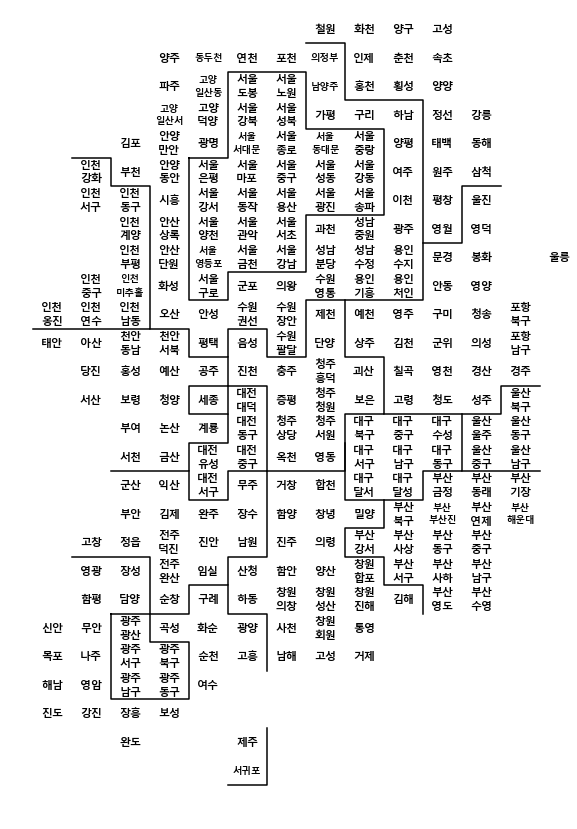

In [107]:
plt.figure( figsize=(10,15) )

for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row[2].split())==2:
        dispname = '{}\n{}'.format(row[2].split()[0], row[2].split()[1])
    elif row[2][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row[2]

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    # 주석(박스 안에 글자) 써 넣기.    
    plt.annotate(dispname, (row[1]+0.5, row[0]+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path) 
    # zip Return값: [(튜플),(튜플),(튜플)...]
    # zip(*[(튜플),(튜플),(튜플)...]) Return값: [ [튜플 0번째 원소들], [튜플 1번째 원소들], ... ]
    # 다시 말해 y좌표의 리스트, x좌표의 리스트를 Return
    plt.plot(xs, ys, c='black', lw=1.5)

# y축을 반대로, 즉 y축 값이 작을 수록 그래프 위에 그려지도록
plt.gca().invert_yaxis()
# x축, y축이 동일한 비율을 갖는 정사각형으로 그리기
# plt.gca().set_aspect(1)

plt.axis('off')

# 패딩 자동조절인데, 내가 하니 그래프가 매우 작아져서 글자가 겹쳤음
# plt.tight_layout()
plt.show()

## 커피지수

In [108]:
CoffeeIndex[CoffeeIndex.index.str.find('제주') >= 0]

,스타벅스,커피빈,이디야,빽다방,커피지수
ID,,,,,
제주,13.0,0.0,6.0,4.0,1.3


## 고유 ID 만들 때 시군구명에 '경기도 수원시', '경기도 안산시' 가 아니라 '수원시','안산시'로 나왔던 행들 제거

In [109]:
tmp_set = set(CoffeeIndex.index) - set(draw_korea['ID'])
tmp_set

{'수원', '안산', '용인', '창원'}

In [110]:
for tmp in tmp_set:
    CoffeeIndex = CoffeeIndex.drop(CoffeeIndex[CoffeeIndex.index==tmp].index)

In [111]:
CoffeeIndex

,스타벅스,커피빈,이디야,빽다방,커피지수
ID,,,,,
강릉,5.0,0.0,15.0,2.0,0.2941
거제,5.0,0.0,7.0,0.0,0.7143
경산,8.0,0.0,9.0,3.0,0.6667
경주,8.0,4.0,25.0,2.0,0.4444
계룡,1.0,0.0,1.0,0.0,1.0000
...,...,...,...,...,...
합천,0.0,0.0,1.0,0.0,0.0000
홍성,0.0,0.0,4.0,2.0,0.0000
화천,0.0,0.0,1.0,0.0,0.0000


## 행이 삭제되었으니 좌표, ID DF draw_korea을 인구 DF pop과 합친다.
- how='left'로 하면 Coffeeindex에 맞추게 되어 없는 구들은 제외되어 나오지 않는다.
- 고유 ID 만들 때 나왔던 도시들이 이디야 커피가 있음에도 불구하고 누락되어 있음
- 검토해 본 결과 저 4개 대기업 카페는 하나도 나오지 않고 개인카페들만 있는 지역들이었음

In [112]:
cf = pd.merge(CoffeeIndex, draw_korea, how='outer',  on = 'ID')
cf.tail(15)

,ID,스타벅스,커피빈,이디야,빽다방,커피지수,y,x
235,횡성,0.0,0.0,1.0,0.0,0.0,2,9
236,예천,0.0,0.0,0.0,1.0,0.0,10,8
237,영월,NaN,NaN,NaN,NaN,NaN,7,10
238,울릉,NaN,NaN,NaN,NaN,NaN,8,13
239,군위,NaN,NaN,NaN,NaN,NaN,11,10
240,의성,NaN,NaN,NaN,NaN,NaN,11,11
241,장수,NaN,NaN,NaN,NaN,NaN,17,5
242,진안,NaN,NaN,NaN,NaN,NaN,18,4
243,의령,NaN,NaN,NaN,NaN,NaN,18,7
244,함평,NaN,NaN,NaN,NaN,NaN,20,1


In [113]:
cf.fillna(0)

,ID,스타벅스,커피빈,이디야,빽다방,커피지수,y,x
0,강릉,5.0,0.0,15.0,2.0,0.2941,3,11
1,거제,5.0,0.0,7.0,0.0,0.7143,22,8
2,경산,8.0,0.0,9.0,3.0,0.6667,12,11
3,경주,8.0,4.0,25.0,2.0,0.4444,12,12
4,계룡,1.0,0.0,1.0,0.0,1.0000,14,4
...,...,...,...,...,...,...,...,...
245,구례,0.0,0.0,0.0,0.0,0.0000,20,4
246,신안,0.0,0.0,0.0,0.0,0.0000,21,0
247,화순,0.0,0.0,0.0,0.0,0.0000,21,4
248,장흥,0.0,0.0,0.0,0.0,0.0000,24,2


## 함수

In [114]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 띄어쓰기를 \n로 바꾸기.
        if len(row['ID'].split())==2:
            dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

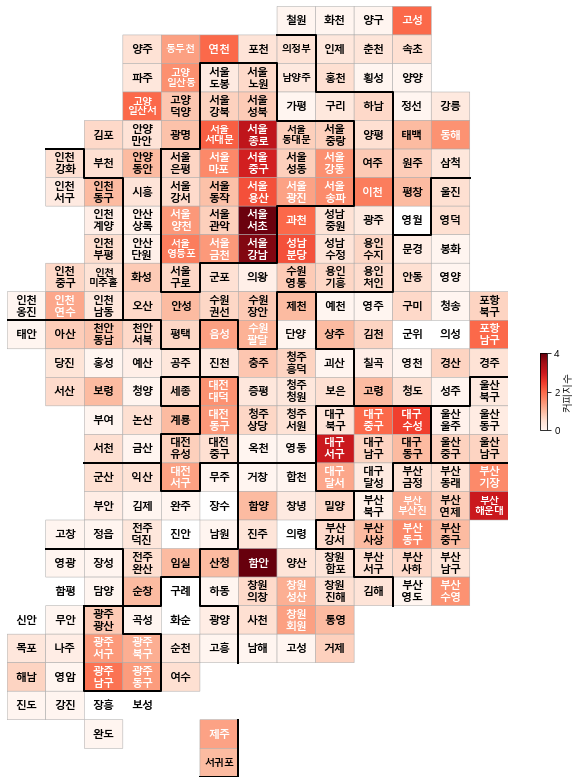

In [115]:
drawKorea('커피지수',cf,'Reds')